In [1]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.datasets import load_iris
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [16]:
data = pd.read_csv('C:/diabetes.csv') 


In [32]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [18]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


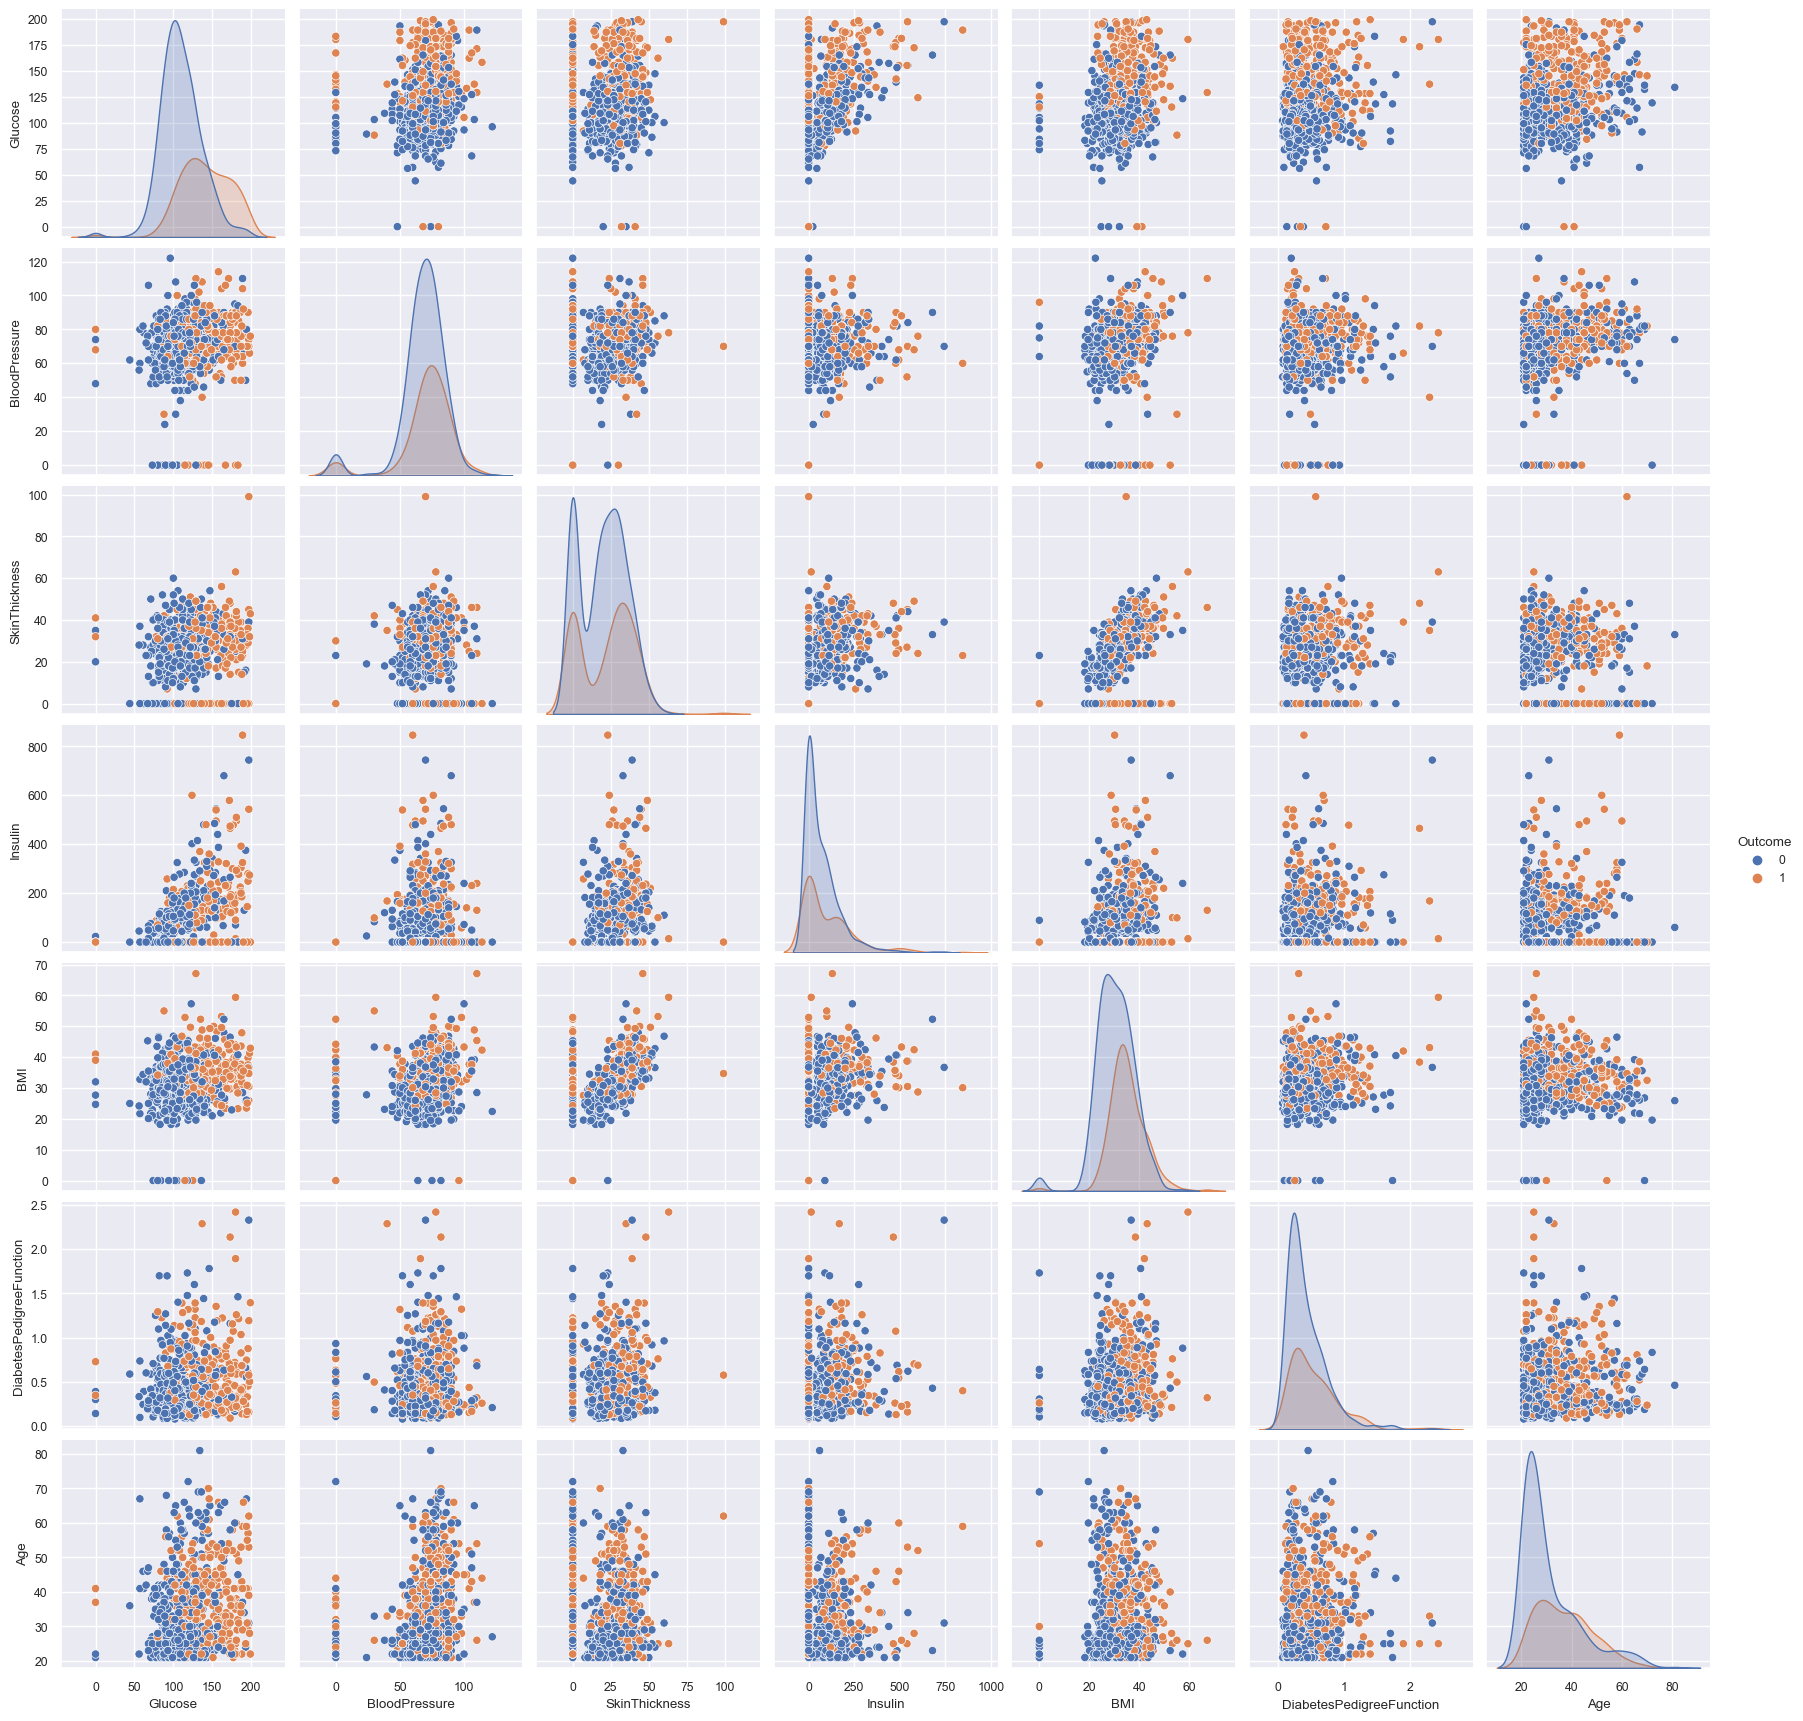

In [27]:
sns.pairplot(data,
            vars=['Glucose', 'BloodPressure','SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
            hue = 'Outcome' )
plt.show()

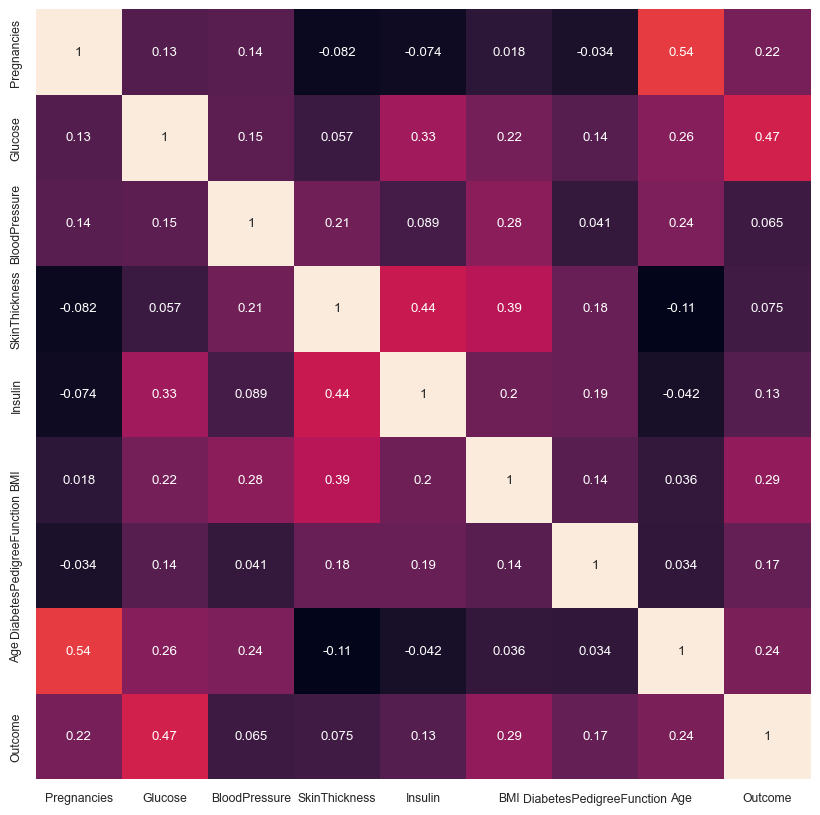

In [23]:
#상관 관계 행렬
df_corr=data.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

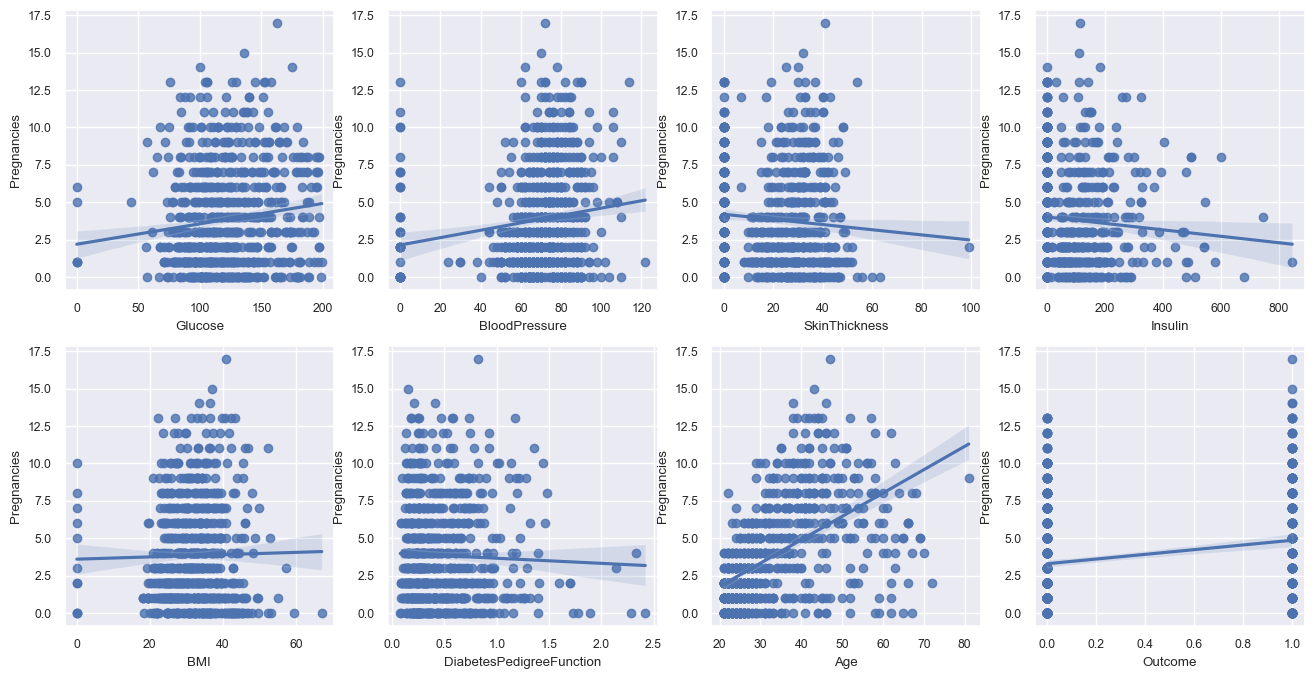

In [29]:
# 2x4 subplot 이용. axs는 4x2
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

lm_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']

# i에는 인덱스가 feature에는 RM ~ RAD까지 순차적으로 들어감
for i, feature in enumerate(lm_features):
    row = int(i/4) # 2행
    col = i%4

    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='Pregnancies' , data=data, ax=axs[row][col])

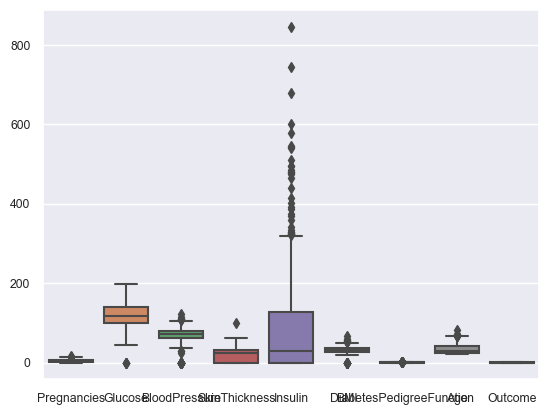

In [35]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler= scaler.fit_transform(data)
scaler = pd.DataFrame(data, columns=data.columns)

sns.boxplot(data=scaler)

plt.show()

In [36]:
scaler.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
from sklearn.model_selection import train_test_split

x_data=data.loc[:, ['Age']]
y_data=data.loc[:, 'Pregnancies' ]
X_train, X_test, y_train, y_test=train_test_split(x_data,
                                                  y_data,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 1) (614,)
(154, 1) (154,)


In [46]:

X_train.head()

,Age
294,65
597,21
749,50
647,22
755,37


In [47]:

y_train.head()

294    0
597    1
749    6
647    0
755    1
Name: Pregnancies, dtype: int64

In [48]:
lr = LinearRegression()

In [49]:

lr.fit(X_train, y_train)

LinearRegression()

In [50]:
print("회귀계수(기울기):", np.round(lr.coef_, 1)) #np: numpy, coef_: 피처에 대한 회귀 계수 값
print("상수항(절편):", np.round(lr.intercept_, 1))  #intercept_: 상수항(절편) 값

회귀계수(기울기): [0.2]
상수항(절편): -1.6


In [51]:
y_preds = lr.predict(X_test)
print(X_train.shape, X_test.shape)

(614, 1) (154, 1)


In [52]:
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_preds):.3f}')

MSE : 8.193, RMSE: 2.862
Variance score : 0.207


In [53]:
print("절편 값:", lr.intercept_) # y축 절편값

# 회귀 계수(coefficient) : 독립변수의 변화에 따라 종속변수에 미치는 영향력이 크기
print("회귀계수:", np.round(lr.coef_,1))

절편 값: -1.6346811750681596
회귀계수: [0.2]


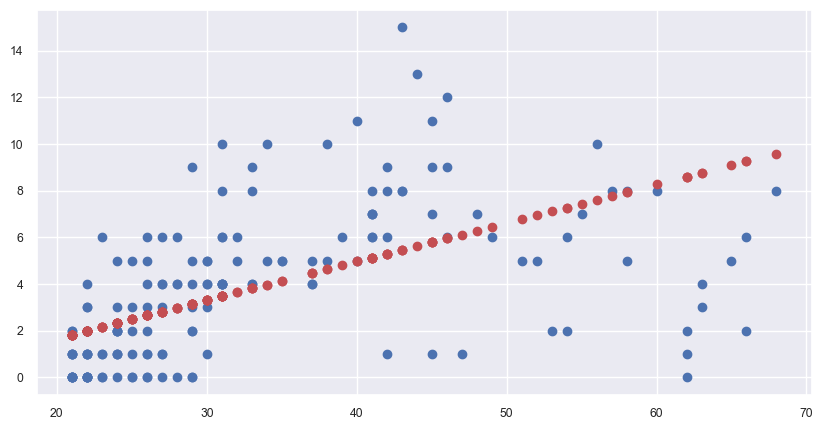

In [55]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Age'], y_test, label='y_test')
plt.scatter(X_test['Age'], y_preds, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()           

In [56]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 2.862394654082524


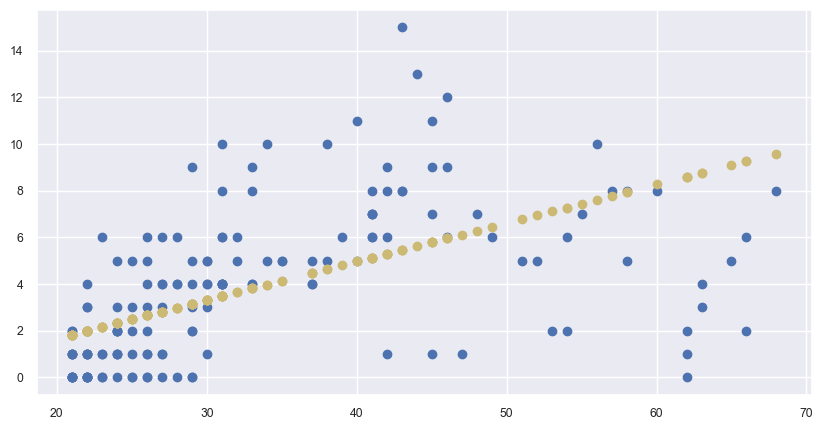

In [61]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Age'], y_test, label='y_test')
plt.scatter(X_test['Age'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()       

In [62]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(dy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 3.0006100683751025


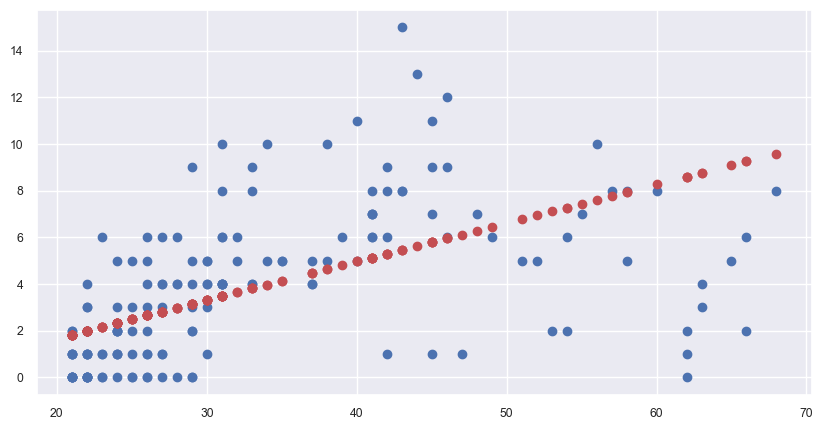

In [64]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Age'], y_test, label='y_test')
plt.scatter(X_test['Age'], y_preds, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()  

In [65]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['LSTAT'], y_test, label='y_test')
plt.scatter(X_test['LSTAT'], ry_preds, c='orange', label='ry_preds')

plt.show()         

KeyError: 'LSTAT'

<Figure size 1000x500 with 0 Axes>

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.17532467532467533
[[ 0 23  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  1  0  3  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  2  0  0  2  0  0  0  0  0  0]
 [ 0  8  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0 16  0  0  0  1  0  2  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  1  0  4  2  0  0  0  0  0  0]
 [ 0  7  0  0  0  1  0  6  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  1  0  0  0  0  0  0]
 [ 0  2  0  0  0  1  1  4  2  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  3  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]]


In [69]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.16233766233766234
[[ 2 18  3  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 2 13  3  1  0  0  0  1  0  1  1  0  1  0  0]
 [ 1 11  1  0  0  0  1  1  0  1  0  0  1  0  0]
 [ 1  4  2  1  0  1  0  0  0  0  0  0  0  0  0]
 [ 6  6  2  2  2  1  0  0  0  0  0  0  0  0  0]
 [ 6  3  1  3  2  0  0  1  1  0  0  0  0  0  0]
 [ 5  2  1  0  0  0  1  4  1  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  1  3  0  1  0  0  0  0  0]
 [ 2  1  0  0  1  1  0  4  1  0  0  0  0  0  0]
 [ 1  2  0  0  0  0  0  1  0  1  0  0  0  0  0]
 [ 1  1  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  1  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]]


In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.17532467532467533
[[ 2 18  3  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 2 13  3  0  0  1  0  1  0  1  1  0  1  0  0]
 [ 1 11  1  0  0  0  1  1  0  1  0  0  1  0  0]
 [ 1  4  2  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 6  6  2  0  0  3  0  2  0  0  0  0  0  0  0]
 [ 3  3  1  0  1  3  1  2  1  0  0  2  0  0  0]
 [ 5  2  1  0  0  0  1  4  1  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  3  0  1  0  0  1  0  0]
 [ 1  1  0  0  0  0  1  4  2  0  1  0  0  0  0]
 [ 1  2  0  0  0  0  0  1  0  1  0  0  0  0  0]
 [ 1  0  0  0  1  1  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  1  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]]


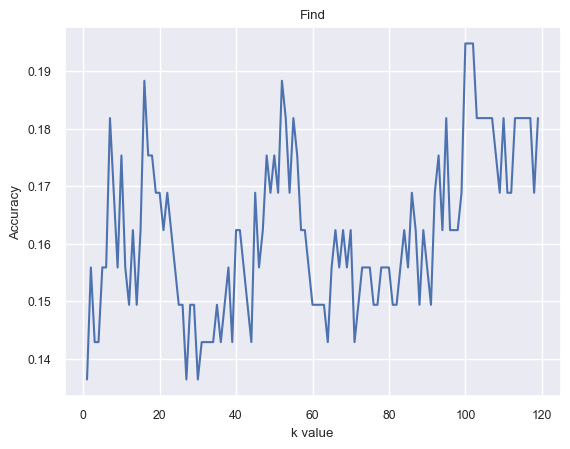

In [71]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1, 120)
find_accuracy = []

for k in k_range:
  find_model = KNeighborsClassifier(n_neighbors = k)
  find_model.fit(X_train, y_train.values.ravel())

  find_accuracy.append(find_model.score(X_test, y_test))
  
plt.plot(k_range, find_accuracy, label="training accuracy")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Find")
plt.show()